In [57]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [78]:
# Load data from Excel sheet
data = pd.read_excel('/home/hollarsaint/Documents/School_Project_Intelligent_Fire_DS/Model_Training/OurDataSheetN.xlsx')

# data has features in columns 1-24 and the target variable in the last column (25th)
X = data.iloc[:, 1:25].values
y = data.iloc[:, 25].values

# Split data into training and testing sets (adjust as needed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize input features if necessary
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

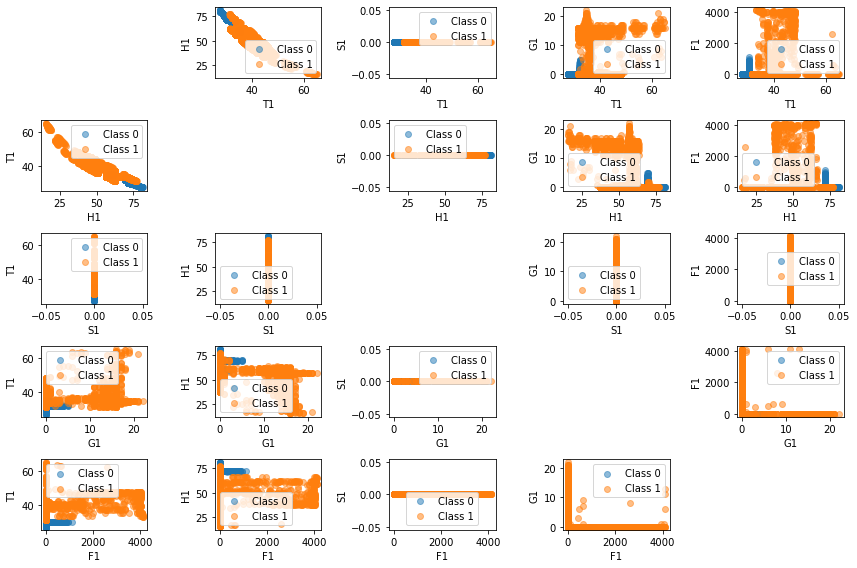

In [12]:
ourdataFrame = pd.DataFrame((data))

#Data visualization

# Assuming you have a DataFrame 'data' with 24 features and a 'target' column containing class labels (0 or 1)
# Replace 'data' and 'target' with your actual data and target columns.

# Combine the features and target into a single DataFrame
data_with_target = ourdataFrame.copy()
target = data_with_target['CLASS_LABEL']

selected_features = data_with_target.columns[1:6]

# Create scatter plots for selected features colored by class labels
plt.figure(figsize=(12, 8))
for i, feature1 in enumerate(selected_features):
    for j, feature2 in enumerate(selected_features):
        if i != j:
            plt.subplot(len(selected_features), len(selected_features), i * len(selected_features) + j + 1)
            for class_label in [0, 1]:  # Assuming binary classification
                plt.scatter(
                    data_with_target[data_with_target['CLASS_LABEL'] == class_label][feature1],
                    data_with_target[data_with_target['CLASS_LABEL'] == class_label][feature2],
                    label=f'Class {class_label}', alpha=0.5
                )
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.legend()
plt.tight_layout()
plt.show()


In [79]:
model = Sequential(
    [
        tf.keras.Input(shape=(24,)),
        Dense(10, activation='sigmoid', name = 'layer1'), #using 10 hidden layers
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                250       
                                                                 
 layer2 (Dense)              (None, 1)                 11        
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

history = model.fit(
    X_train,y_train,            
    epochs=10,
)

Epoch 1/10
119/119 [==============================] - 1s 3ms/step - loss: 0.2165
Epoch 2/10
119/119 [==============================] - 0s 3ms/step - loss: 0.0838
Epoch 3/10
119/119 [==============================] - 0s 3ms/step - loss: 0.0714
Epoch 4/10
119/119 [==============================] - 0s 3ms/step - loss: 0.0612
Epoch 5/10
119/119 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 6/10
119/119 [==============================] - 0s 3ms/step - loss: 0.0390
Epoch 7/10
119/119 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 8/10
119/119 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 9/10
119/119 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 10/10
119/119 [==============================] - 0s 3ms/step - loss: 0.0124


In [88]:
ytest_pred = model.predict(X_test)
ytest_pred_classes = (ytest_pred > 0.5).astype(int)
print(ytest_pred_classes)


30/30 [==============================] - 0s 2ms/step
[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [

In [81]:
# Calculate accuracy using scikit-learn's accuracy_score function
accuracy = accuracy_score(y_test, ytest_pred_classes)

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

#calculate and print f1-score
print(f1_score(y_test, ytest_pred_classes))

Accuracy: 100.00%
1.0


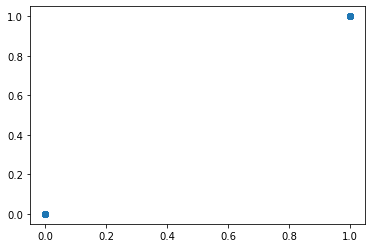

In [83]:
plt.scatter(ytest_pred_classes, y_test, marker=0)

In [85]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(24, 10):
 [[-9.13263559e-01  8.48385394e-01 -1.01333094e+00 -1.80591071e+00
  -8.55783522e-01  1.32804489e+00 -1.47663283e+00  1.49052119e+00
   9.44239855e-01 -1.38118541e+00]
 [ 4.51381296e-01  1.06618035e+00  7.72578895e-01  6.80561185e-01
  -1.19358194e+00 -4.10878152e-01  8.02703321e-01 -7.89371729e-01
   1.60419774e+00 -1.68712223e+00]
 [-1.19807303e-01 -1.57966882e-01 -9.15267169e-02 -2.02003509e-01
   2.66786784e-01 -3.08260322e-03 -1.11544162e-01 -3.17741483e-01
  -5.72736263e-02  2.60090500e-01]
 [-4.94857639e-01  9.12300408e-01 -8.19455326e-01 -1.12716091e+00
  -4.96654481e-01  6.72876298e-01 -1.11718988e+00  5.16825140e-01
   4.79250818e-01 -8.80428135e-01]
 [-2.76706338e-01  9.09828603e-01 -3.38134646e-01 -5.47142863e-01
  -7.46893764e-01  5.60024381e-01 -4.55855340e-01  4.66305345e-01
   1.25781882e+00 -7.52638638e-01]
 [ 1.88069358e-01 -3.49484205e-01  3.23020667e-01  5.23525000e-01
   8.56208980e-01 -9.85314965e-01  6.05139196e-01 -6.95249200e-01
  -2.41057687e-02  6

In [86]:
print(type(W1))


<class 'numpy.ndarray'>


In [87]:
#code to set weight of trained model
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])


W1(24, 10):
 [[-9.13263559e-01  8.48385394e-01 -1.01333094e+00 -1.80591071e+00
  -8.55783522e-01  1.32804489e+00 -1.47663283e+00  1.49052119e+00
   9.44239855e-01 -1.38118541e+00]
 [ 4.51381296e-01  1.06618035e+00  7.72578895e-01  6.80561185e-01
  -1.19358194e+00 -4.10878152e-01  8.02703321e-01 -7.89371729e-01
   1.60419774e+00 -1.68712223e+00]
 [-1.19807303e-01 -1.57966882e-01 -9.15267169e-02 -2.02003509e-01
   2.66786784e-01 -3.08260322e-03 -1.11544162e-01 -3.17741483e-01
  -5.72736263e-02  2.60090500e-01]
 [-4.94857639e-01  9.12300408e-01 -8.19455326e-01 -1.12716091e+00
  -4.96654481e-01  6.72876298e-01 -1.11718988e+00  5.16825140e-01
   4.79250818e-01 -8.80428135e-01]
 [-2.76706338e-01  9.09828603e-01 -3.38134646e-01 -5.47142863e-01
  -7.46893764e-01  5.60024381e-01 -4.55855340e-01  4.66305345e-01
   1.25781882e+00 -7.52638638e-01]
 [ 1.88069358e-01 -3.49484205e-01  3.23020667e-01  5.23525000e-01
   8.56208980e-01 -9.85314965e-01  6.05139196e-01 -6.95249200e-01
  -2.41057687e-02  6